In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [6]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv.gz")
df_test = pd.read_csv("test.csv.gz")

In [7]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98


In [8]:
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#store gap values
Y_train = df_train.gap.values
#row where testing examples start
test_idx = df_train.shape[0]
#delete 'Id' column
df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column
df_train = df_train.drop(['gap'], axis=1)

In [10]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
"""
Example Feature Engineering

this calculates the length of each smile string and adds a feature column with those lengths
Note: this is NOT a good feature and will result in a lower score!
"""
#smiles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
#df_all['smiles_len'] = pd.DataFrame(smiles_len)


'\nExample Feature Engineering\n\nthis calculates the length of each smile string and adds a feature column with those lengths\nNote: this is NOT a good feature and will result in a lower score!\n'

In [13]:
#Drop the 'smiles' column
df_all = df_all.drop(['smiles'], axis=1)
vals = df_all.values
X_train = vals[:test_idx]
X_test = vals[test_idx:]
print("Train features:", X_train.shape)
print("Train gap:", Y_train.shape)
print("Test features:", X_test.shape)

Train features: (1000000, 256)
Train gap: (1000000,)
Test features: (824230, 256)


In [14]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)

In [15]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

In [16]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [ ]:
write_to_file("sample1.csv", LR_pred)
write_to_file("sample2.csv", RF_pred)

In [20]:
help(LR)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 |

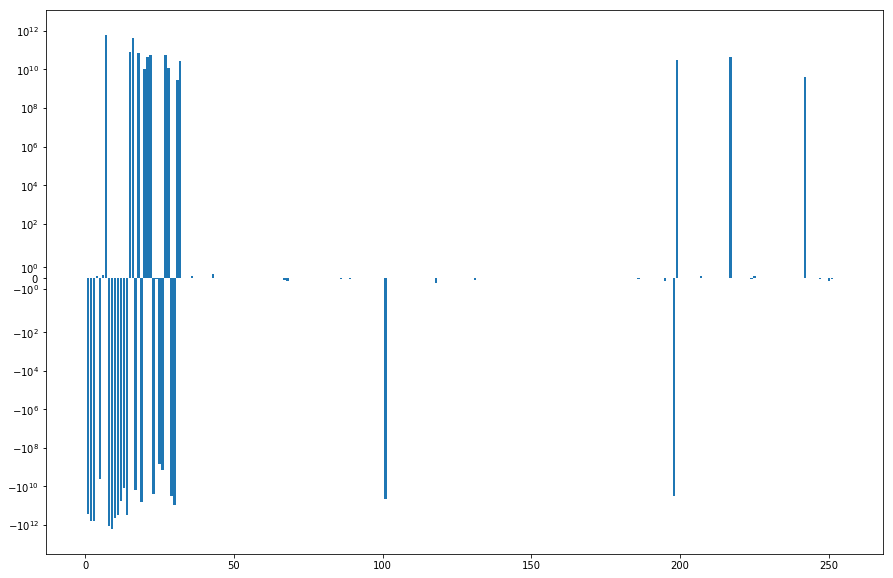

In [45]:
plt.figure(figsize=(15,10))
plt.bar(range(len(LR.coef_)), LR.coef_)
plt.yscale('symlog')
plt.show()

In [38]:
# Calculate initial R^2
print(LR.score(X_train, Y_train))
print(RF.score(X_train, Y_train))

0.461025977125
0.554161155142


In [43]:
help(RF)

Help on RandomForestRegressor in module sklearn.ensemble.forest object:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and use averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion, and "mae" for the mean
 |      absolute

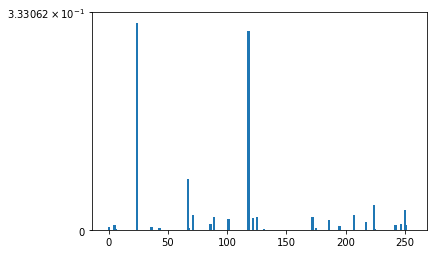

In [44]:
plt.bar(range(len(RF.feature_importances_)), RF.feature_importances_, 2)
plt.yscale('symlog')
plt.show()

In [46]:
# Drop predictors that are unimportant in both LR and RF
LR_coef = LR.coef_
RF_imp = RF.feature_importances_
i0 = (LR_coef == 0) & (RF_imp == 0)
X_train1 = X_train[:,i0 == False]

In [47]:
# Redo regressions
LR1 = LinearRegression()
LR1.fit(X_train1, Y_train)
RF1 = RandomForestRegressor()
RF1.fit(X_train1, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
# Recalculate R^2
print(LR1.score(X_train1, Y_train))
print(RF1.score(X_train1, Y_train))

0.461038269567
0.554159187105


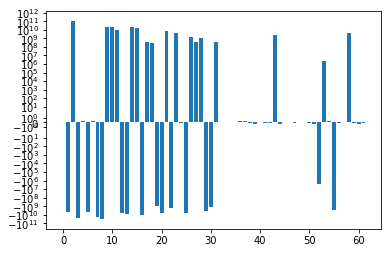

In [51]:
plt.bar(range(len(LR1.coef_)), LR1.coef_)
plt.yscale('symlog')
plt.show()

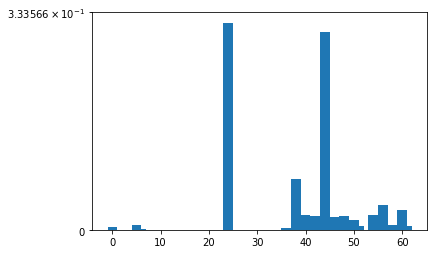

In [52]:
plt.bar(range(len(RF1.feature_importances_)), RF1.feature_importances_, 2)
plt.yscale('symlog')
plt.show()

In [53]:
# Test only features with RF importance > 0
RF_imp1 = RF1.feature_importances_
LR_coef1 = LR.coef_
i1 = (RF_imp1 > 0)
X_train2 = X_train1[:,i1]

In [54]:
LR2 = LinearRegression()
LR2.fit(X_train2, Y_train)
RF2 = RandomForestRegressor()
RF2.fit(X_train2, Y_train)
print(LR2.score(X_train2, Y_train))
print(RF2.score(X_train2, Y_train))

0.461037535886
0.55416013125


In [55]:
X_train2.shape

(1000000, 31)

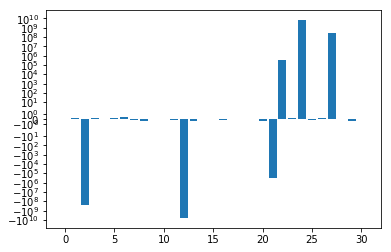

In [57]:
plt.bar(range(len(LR2.coef_)), LR2.coef_)
plt.yscale('symlog')
plt.show()

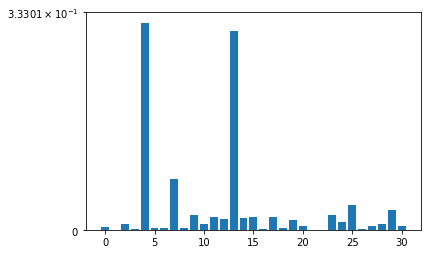

In [59]:
plt.bar(range(len(RF2.feature_importances_)), RF2.feature_importances_)
plt.yscale('symlog')
plt.show()

In [70]:
LR_coef2 = LR2.coef_
RF_imp2 = RF2.feature_importances_

In [91]:
# Drop the least important RF feature in each iteration
X_train0 = X_train2
nx = np.array([])
R2_LR = np.array([])
R2_RF = np.array([])
for i in range(30):
    LR0 = LinearRegression()
    LR0.fit(X_train0, Y_train)
    RF0 = RandomForestRegressor()
    RF0.fit(X_train0, Y_train)
    print('LR(',i+1,'): ',LR0.score(X_train0, Y_train))
    print('RF(',i+1,'): ',RF0.score(X_train0, Y_train))
    n0 = X_train0.shape[1]
    nx = np.append(nx,n0)
    R2_LR = np.append(R2_LR,LR0.score(X_train0, Y_train))
    R2_RF = np.append(R2_RF,RF0.score(X_train0, Y_train))
    i0 = (range(n0) != RF0.feature_importances_.argmin())
    X_train0 = X_train0[:,i0]

LR( 1 ):  0.461037535886
RF( 1 ):  0.554151377388
LR( 2 ):  0.461036270578
RF( 2 ):  0.554157216
LR( 3 ):  0.461036284923
RF( 3 ):  0.554156637825
LR( 4 ):  0.46094125547
RF( 4 ):  0.553944778913
LR( 5 ):  0.460901625442
RF( 5 ):  0.553943517091
LR( 6 ):  0.460179726007
RF( 6 ):  0.553928203126
LR( 7 ):  0.459706597906
RF( 7 ):  0.553116761508
LR( 8 ):  0.458371583134
RF( 8 ):  0.552946118719
LR( 9 ):  0.458331703566
RF( 9 ):  0.551374648877
LR( 10 ):  0.455302085306
RF( 10 ):  0.549760051615
LR( 11 ):  0.455087479995
RF( 11 ):  0.549574017694
LR( 12 ):  0.45459924113
RF( 12 ):  0.547786784993
LR( 13 ):  0.448234307771
RF( 13 ):  0.544824645561
LR( 14 ):  0.448150130583
RF( 14 ):  0.541816138413
LR( 15 ):  0.448150577671
RF( 15 ):  0.541818000951
LR( 16 ):  0.447436535208
RF( 16 ):  0.535097785326
LR( 17 ):  0.445835534228
RF( 17 ):  0.528996194821
LR( 18 ):  0.445836530438
RF( 18 ):  0.52899627141
LR( 19 ):  0.442223133773
RF( 19 ):  0.521813806405
LR( 20 ):  0.441944635433
RF( 20 ): 

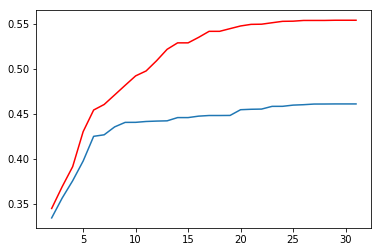

In [92]:
plt.plot(nx,R2_LR)
plt.plot(nx,R2_RF,c='r')
plt.show()

In [130]:
#Implement Ridge regression
from sklearn.linear_model import Ridge

In [115]:
ridge = Ridge(alpha=0.1, normalize=True) #Inialize alpha to 0.1
ridge_coef = ridge.fit(X_train2, Y_train).coef_
ridge.score(X_train2, Y_train)

0.45236625858580692

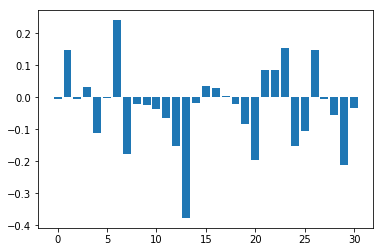

In [116]:
plt.bar(range(len(ridge_coef)), ridge_coef)
plt.show()

In [117]:
#Implement Lasso regression
from sklearn.linear_model import Lasso

In [121]:
lasso = Lasso(alpha=0.001,normalize=True) #Inialize alpha to 0.1
lasso_coef = lasso.fit(X_train2, Y_train).coef_
lasso.score(X_train2, Y_train)
# Why is Lasso fit not working??? Model not sensitive enough to the data?

0.0

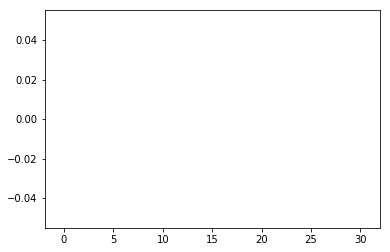

In [122]:
plt.bar(range(len(lasso_coef)), lasso_coef)
plt.show()

In [127]:
#Implement Cross-validation
from sklearn.model_selection import cross_val_score
LR_cv = LinearRegression()

In [129]:
#Try 3-, 5- and 10-fold Cross-validation
cv3_results = cross_val_score(LR_cv, X_train2, Y_train, cv=3)
print(cv3_results)
print(np.mean(cv3_results), np.std(cv3_results))
cv5_results = cross_val_score(LR_cv, X_train2, Y_train, cv=5)
print(cv5_results)
print(np.mean(cv5_results), np.std(cv5_results))
cv10_results = cross_val_score(LR_cv, X_train2, Y_train, cv=10)
print(cv10_results)
print(np.mean(cv10_results), np.std(cv10_results))
# 5-fold CV seems OK

[ 0.46264171  0.46145854  0.45888931]
0.460996520416 0.00156636219245
[ 0.46237257  0.46210402  0.4614502   0.45969942  0.45938669]
0.461002579365 0.00123286166459
[ 0.46632674  0.45837472  0.46581813  0.45841062  0.46077532  0.46214538
  0.46222505  0.4571751   0.46342142  0.45535467]
0.461002714493 0.00347003590046


In [132]:
#Implement Grid search cross-validation
from sklearn.model_selection import GridSearchCV
# with Ridge regression
alpha_grid = {'alpha':np.logspace(-4,0,50)}
ridge = Ridge(alpha=0.1, normalize=True)
ridge_cv = GridSearchCV(ridge,alpha_grid,cv=5) #Instantiate Grid search CV regressor
ridge_cv.fit(X_train2,Y_train) #Fit data and tune alpha to optimal value
print('Optimal Ridge parameter:', ridge_cv.best_params_)
print('Best score: ', ridge_cv.best_score_)

Optimal Ridge parameter: {'alpha': 0.0001}
Best score:  0.461005562454


In [143]:
# Create hold-out set (i.e. a test set from given data)
from sklearn.model_selection import train_test_split
X_train3, X_holdout3, Y_train3, Y_holdout3 = train_test_split(X_train2, Y_train, test_size=0.2, random_state=42) #How to set random_state?
print(X_train3.shape, X_holdout3.shape, Y_train3.shape, Y_holdout3.shape)

(800000, 31) (200000, 31) (800000,) (200000,)


In [144]:
# Try ElasticNet regression (combination of Ridge and Lasso)
from sklearn.linear_model import ElasticNet
# Create the hyperparameter grid (L1=1 for Lasso, <1 for Lasso/Ridge combination)
l1_space = np.linspace(0, 1, 30)
l1_grid = {'l1_ratio': l1_space}
# Instantiate the ElasticNet regressor: EN
EN = ElasticNet()
# Setup the GridSearchCV object: EN_cv
EN_cv = GridSearchCV(EN, l1_grid, cv=5)

In [145]:
# Fit it to the new training data
EN_cv.fit(X_train3, Y_train3)
# Predict on the test set and compute metrics
Y_pred3 = EN_cv.predict(X_holdout3)
r2_EN_cv = EN_cv.score(X_holdout3, Y_holdout3)
from sklearn.metrics import mean_squared_error
mse_EN_cv = mean_squared_error(Y_holdout3, Y_pred3)
print("Tuned ElasticNet l1 ratio: {}".format(EN_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2_EN_cv))
print("Tuned ElasticNet MSE: {}".format(mse_EN_cv))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did no

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.17387155110872932
Tuned ElasticNet MSE: 0.13709885855522805


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [146]:
# Optimize Ridge alpha on new training data. Try lower range
alpha_grid = {'alpha':np.logspace(-6,-1,100)}
ridge = Ridge(normalize=True) # Initialize Ridge regressor
ridge_cv = GridSearchCV(ridge,alpha_grid,cv=5) #Instantiate GridSearch CV regressor
ridge_cv.fit(X_train3,Y_train3) #Fit data and tune alpha to optimal value
print('Optimal Ridge parameter:', ridge_cv.best_params_)
print('Best score: ', ridge_cv.best_score_)
# Predict on the holdout set and compute metrics
Y_pred3 = ridge_cv.predict(X_holdout3)
r2_ridge_cv = ridge_cv.score(X_holdout3, Y_holdout3)
mse_ridge_cv = mean_squared_error(Y_holdout3, Y_pred3)
print("Tuned Ridge R^2: {}".format(r2_ridge_cv))
print("Tuned Ridge MSE: {}".format(mse_ridge_cv))

Optimal Ridge parameter: {'alpha': 5.8570208180566735e-05}
Best score:  0.461489960329
Tuned Ridge R^2: 0.4590139793580381
Tuned Ridge MSE: 0.0897784914971613


In [159]:
# Drop features according to results from Ridge optimized by Grid Search Cross-Validation
X_train0 = X_train3
Y_train0 = Y_train3
X_holdout0 = X_holdout3
Y_holdout0 = Y_holdout3
nx = np.array([])
R2_train_rcv = np.array([])
R2_holdout_rcv = np.array([])
R2_train_RF = np.array([])
R2_holdout_RF = np.array([])
alpha_grid = {'alpha':np.logspace(-6,-1,50)}
for i in range(31):
    n0 = X_train0.shape[1]
    nx = np.append(nx,n0)
    print('No. of predictors:', n0)
    ridge = Ridge(alpha=0.1,normalize=True) # Initialize Ridge regressor
    rcv = GridSearchCV(ridge,alpha_grid,cv=5) # Initiate GridSearch CV regressor
    rcv.fit(X_train0,Y_train0) #Fit data and tune alpha to optimal value
    print('   Optimal Ridge parameter:', rcv.best_params_)
    print('   Best score: ', rcv.best_score_)
    # Predict on both training and holdout set and compute metrics
    Y_pred0 = rcv.predict(X_holdout0)
    R2_train_rcv0   = rcv.score(X_train0,   Y_train0)
    R2_holdout_rcv0 = rcv.score(X_holdout0, Y_holdout0)
    mse_rcv = mean_squared_error(Y_holdout0, Y_pred0)
    print("   Tuned Ridge R^2 (train,holdout): {}, {}".format(R2_train_rcv0,R2_holdout_rcv0))
    print("   Tuned Ridge MSE (holdout): {}".format(mse_rcv))
    R2_train_rcv = np.append(R2_train_rcv, R2_train_rcv0)
    R2_holdout_rcv = np.append(R2_holdout_rcv, R2_holdout_rcv0)
    # Compare to Random Forest result
    RF0 = RandomForestRegressor()
    RF0.fit(X_train0, Y_train0)
    R2_train_RF0 = RF0.score(X_train0, Y_train0)
    R2_holdout_RF0 = RF0.score(X_holdout0, Y_holdout0)
    print('   Random Forest R^2 (train,holdout): {}, {}'.format(R2_train_RF0,R2_holdout_RF0))
    R2_train_RF = np.append(R2_train_RF, R2_train_RF0)
    R2_holdout_RF = np.append(R2_holdout_RF, R2_holdout_RF0)
    # Drop least important RF feature
    i0 = (range(n0) != RF0.feature_importances_.argmin())
    X_train0 = X_train0[:,i0]
    X_holdout0 = X_holdout0[:,i0]

No. of predictors: 31
   Optimal Ridge parameter: {'alpha': 5.4286754393238594e-05}
   Best score:  0.461489958422
   Tuned Ridge R^2 (train,holdout): 0.4615412870213542, 0.45901409322897
   Tuned Ridge MSE (holdout): 0.08977847259988837
   Random Forest R^2 (train,holdout): 0.5544669644856763, 0.5516018947381855
No. of predictors: 30
   Optimal Ridge parameter: {'alpha': 5.4286754393238594e-05}
   Best score:  0.461489676192
   Tuned Ridge R^2 (train,holdout): 0.4615369142822322, 0.4590204038087752
   Tuned Ridge MSE (holdout): 0.08977742533745688
   Random Forest R^2 (train,holdout): 0.5544565414451084, 0.551581353119931
No. of predictors: 29
   Optimal Ridge parameter: {'alpha': 5.4286754393238594e-05}
   Best score:  0.461489676392
   Tuned Ridge R^2 (train,holdout): 0.46153691430385313, 0.4590204026627419
   Tuned Ridge MSE (holdout): 0.08977742552764505
   Random Forest R^2 (train,holdout): 0.5544631765402315, 0.5516241924179079
No. of predictors: 28
   Optimal Ridge parameter: {

   Optimal Ridge parameter: {'alpha': 1.67683293681101e-05}
   Best score:  0.397946631086
   Tuned Ridge R^2 (train,holdout): 0.3979655771529226, 0.395630765700685
   Tuned Ridge MSE (holdout): 0.10029715388634257
   Random Forest R^2 (train,holdout): 0.4306401295308582, 0.4284814033616793
No. of predictors: 4
   Optimal Ridge parameter: {'alpha': 1.3257113655901109e-05}
   Best score:  0.375878839568
   Tuned Ridge R^2 (train,holdout): 0.37589705088551306, 0.3741144608050647
   Tuned Ridge MSE (holdout): 0.10386785871496182
   Random Forest R^2 (train,holdout): 0.3914871059542564, 0.39014108756588084
No. of predictors: 3
   Optimal Ridge parameter: {'alpha': 1.67683293681101e-05}
   Best score:  0.356524900459
   Tuned Ridge R^2 (train,holdout): 0.3565409678307798, 0.3552027447921292
   Tuned Ridge MSE (holdout): 0.10700632305688565
   Random Forest R^2 (train,holdout): 0.36911270507587035, 0.36809809726937337
No. of predictors: 2
   Optimal Ridge parameter: {'alpha': 1.6768329368110

In [156]:
# Try the same in non-regularized linear regression
X_train0 = X_train3
Y_train0 = Y_train3
X_holdout0 = X_holdout3
Y_holdout0 = Y_holdout3
nx = np.array([])
R2_train_LR = np.array([])
R2_holdout_LR = np.array([])
R2_train_RF = np.array([])
R2_holdout_RF = np.array([])
for i in range(31):
    n0 = X_train0.shape[1]
    nx = np.append(nx,n0)
    print('No. of predictors:', n0)
    LR0 = LinearRegression()
    LR0.fit(X_train0, Y_train0)
    R2_train_LR0 = LR0.score(X_train0, Y_train0)
    R2_holdout_LR0 = LR0.score(X_holdout0, Y_holdout0) 
    print('   NR Linear Regression R^2 (train,holdout): {}, {}'.format(R2_train_LR0,R2_holdout_LR0))
    R2_train_LR = np.append(R2_train_LR, R2_train_LR0)
    R2_holdout_LR = np.append(R2_holdout_LR, R2_holdout_LR0)
    # Compare to Random Forest result
    RF0 = RandomForestRegressor()
    RF0.fit(X_train0, Y_train0)
    R2_train_RF0 = RF0.score(X_train0, Y_train0)
    R2_holdout_RF0 = RF0.score(X_holdout0, Y_holdout0)
    print('   Random Forest R^2 (train,holdout): {}, {}'.format(R2_train_RF0,R2_holdout_RF0))
    R2_train_RF = np.append(R2_train_RF, R2_train_RF0)
    R2_holdout_RF = np.append(R2_holdout_RF, R2_holdout_RF0)
    # Drop least important RF feature
    i0 = (range(n0) != RF0.feature_importances_.argmin())
    X_train0 = X_train0[:,i0]
    X_holdout0 = X_holdout0[:,i0]

No. of predictors: 31
   NR Linear Regression R^2 (train,holdout): 0.46153993595628773, 0.45901235466094914
   Random Forest R^2 (train,holdout): 0.5544584504489196, 0.5516010535979181
No. of predictors: 30
   NR Linear Regression R^2 (train,holdout): 0.4615367590545181, 0.4590206517118671
   Random Forest R^2 (train,holdout): 0.5544609406197744, 0.5515829832864672
No. of predictors: 29
   NR Linear Regression R^2 (train,holdout): 0.46153674331180705, 0.459020636537532
   Random Forest R^2 (train,holdout): 0.5544575095420763, 0.5515595642838094
No. of predictors: 28
   NR Linear Regression R^2 (train,holdout): 0.4614495578568437, 0.45889532630066887
   Random Forest R^2 (train,holdout): 0.5542411371723615, 0.5513819878686399
No. of predictors: 27
   NR Linear Regression R^2 (train,holdout): 0.4614275306066661, 0.45886074460023296
   Random Forest R^2 (train,holdout): 0.5542263947767236, 0.5513230373829381
No. of predictors: 26
   NR Linear Regression R^2 (train,holdout): 0.460684711778

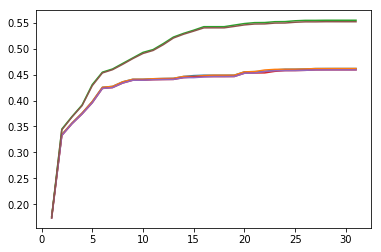

In [160]:
plt.plot(nx,R2_train_rcv)
plt.plot(nx,R2_train_LR)
plt.plot(nx,R2_train_RF)
plt.plot(nx,R2_holdout_rcv)
plt.plot(nx,R2_holdout_LR)
plt.plot(nx,R2_holdout_RF)
plt.show()

In [174]:
# Create array of feature indices ordered by importance
print(X_train.shape, Y_train.shape, RF.feature_importances_.shape)
imp = np.flip(np.argsort(RF.feature_importances_),0)
print(imp[0])

(1000000, 256) (1000000,) (256,)
24


2.05105743288 0.40315513931
1.69997992082 0.308615116601
-0.351077512058


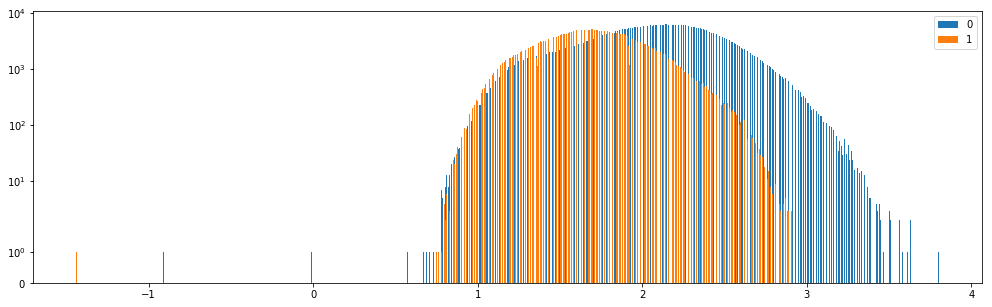

In [276]:
h0 = np.logical_not(X_train[:,imp[0]])
h1 = np.logical_and(X_train[:,imp[0]],1)
print(Y_train[h0].mean(), Y_train[h0].std())
print(Y_train[h1].mean(), Y_train[h1].std())
print(Y_train[h1].mean()-Y_train[h0].mean())
plt.figure(figsize=(17,5))
plt.hist(Y_train[h0],1000)
plt.hist(Y_train[h1],1000)
plt.yscale('symlog')
plt.legend(['0','1'])
plt.show()

In [243]:
n_train = X_train.shape[0]
n_test  = X_test.shape[0]
for i in range(256):
    h1 = (X_train[:,imp[i]] == 1)
    t1 = (X_test[:,imp[i]] == 1)
    print(i+1, ') Feature ', imp[i],': train ',sum(h1), 100*sum(h1)/n_train,'%, test ',sum(t1), 100*sum(t1)/n_test,'%')

1 ) Feature  24 : train  385474 38.5474 %, test  318217 38.6077915145 %
2 ) Feature  118 : train  292201 29.2201 %, test  239947 29.1116557272 %
3 ) Feature  67 : train  621252 62.1252 %, test  512035 62.1228297927 %
4 ) Feature  224 : train  334526 33.4526 %, test  275771 33.4580153598 %
5 ) Feature  250 : train  218787 21.8787 %, test  180673 21.9202164444 %
6 ) Feature  207 : train  40061 4.0061 %, test  32517 3.94513667302 %
7 ) Feature  71 : train  770810 77.081 %, test  634196 76.9440568773 %
8 ) Feature  89 : train  800323 80.0323 %, test  659667 80.0343350764 %
9 ) Feature  172 : train  436831 43.6831 %, test  359844 43.6582022008 %
10 ) Feature  125 : train  933919 93.3919 %, test  769664 93.3797605037 %
11 ) Feature  122 : train  301730 30.173 %, test  248277 30.1222959611 %
12 ) Feature  101 : train  290511 29.0511 %, test  239588 29.0680999236 %
13 ) Feature  186 : train  155527 15.5527 %, test  128523 15.5930990136 %
14 ) Feature  217 : train  290511 29.0511 %, test  23958

152 ) Feature  202 : train  0 0.0 %, test  0 0.0 %
153 ) Feature  219 : train  0 0.0 %, test  0 0.0 %
154 ) Feature  201 : train  0 0.0 %, test  0 0.0 %
155 ) Feature  200 : train  0 0.0 %, test  0 0.0 %
156 ) Feature  197 : train  0 0.0 %, test  0 0.0 %
157 ) Feature  196 : train  0 0.0 %, test  0 0.0 %
158 ) Feature  194 : train  0 0.0 %, test  0 0.0 %
159 ) Feature  193 : train  0 0.0 %, test  0 0.0 %
160 ) Feature  192 : train  0 0.0 %, test  0 0.0 %
161 ) Feature  191 : train  0 0.0 %, test  0 0.0 %
162 ) Feature  190 : train  0 0.0 %, test  0 0.0 %
163 ) Feature  189 : train  0 0.0 %, test  0 0.0 %
164 ) Feature  188 : train  0 0.0 %, test  0 0.0 %
165 ) Feature  187 : train  0 0.0 %, test  0 0.0 %
166 ) Feature  218 : train  0 0.0 %, test  0 0.0 %
167 ) Feature  220 : train  0 0.0 %, test  0 0.0 %
168 ) Feature  184 : train  0 0.0 %, test  0 0.0 %
169 ) Feature  237 : train  0 0.0 %, test  0 0.0 %
170 ) Feature  253 : train  0 0.0 %, test  0 0.0 %
171 ) Feature  252 : train  0 0

In [294]:
# Flip X such that Y(1) > Y(0) for all features
n2 = X_train2.shape[1]
X_trainb = (X_train == 1)
for i in range(n2): 
    b0 = X_trainb[:,imp[i]]
    if Y_train[np.logical_not(b0)].mean() > Y_train[b0].mean():
        X_trainb[b0] = np.logical_not(X_trainb[b0])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [295]:
'mean1'
Y_train2_mean1 = np.array([[Y_train[np.logical_and(X_trainb[:,imp[i]],X_trainb[:,imp[j]])].mean() for i in range(n2)] for j in range(n2)])
'mean0'
Y_train2_mean0 = np.array([[Y_train[np.logical_and(np.logical_not(X_trainb[:,imp[i]]),np.logical_not(X_trainb[:,imp[j]]))].mean() for i in range(n2)] for j in range(n2)])
'std1'
Y_train2_std1  = np.array([[Y_train[np.logical_and(X_trainb[:,imp[i]],X_trainb[:,imp[j]])].std() for i in range(n2)] for j in range(n2)])
'std0'
Y_train2_std0  = np.array([[Y_train[np.logical_and(np.logical_not(X_trainb[:,imp[i]]),np.logical_not(X_trainb[:,imp[j]]))].std() for i in range(n2)] for j in range(n2)])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2.54915793715 1.37092391304


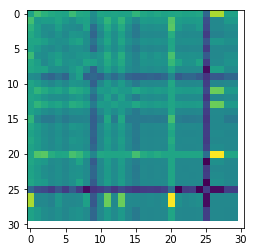

In [307]:
print(np.nanmax(Y_train2_mean1), np.nanmin(Y_train2_mean1))
plt.imshow(Y_train2_mean1)
plt.show()

2.37326633166 1.49595212187


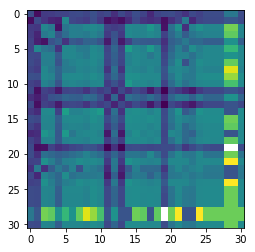

In [299]:
print(np.nanmax(Y_train2_mean0), np.nanmin(Y_train2_mean0))
plt.imshow(Y_train2_mean0)
plt.show()

0.717762314629 -0.585553192392


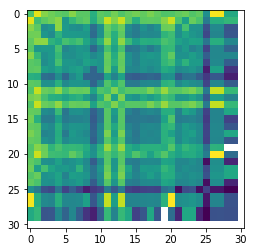

In [301]:
print(np.nanmax(Y_train2_mean1-Y_train2_mean0), np.nanmin(Y_train2_mean1-Y_train2_mean0))
plt.imshow(Y_train2_mean1-Y_train2_mean0)
plt.show()

In [308]:
# Try 3D plota
from mpl_toolkits.mplot3d import Axes3D

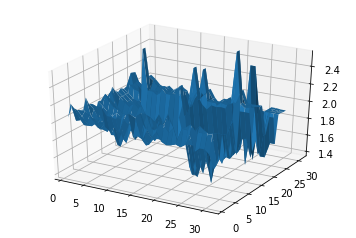

In [338]:
x = np.resize(np.array(range(1,32)).reshape(-1,1),(31,31))
y = x.T
z = Y_train2_mean1
ax = plt.gca(projection='3d')
ax.plot_surface(x,y,z)
plt.show()

In [333]:
,zhelp(Axes3D.plot_surface)

Help on function plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(self, X, Y, Z, *args, **kwargs)
    Create a surface plot.
    
    By default it will be colored in shades of a solid color,
    but it also supports color mapping by supplying the *cmap*
    argument.
    
    The `rstride` and `cstride` kwargs set the stride used to
    sample the input data to generate the graph.  If 1k by 1k
    arrays are passed in, the default values for the strides will
    result in a 100x100 grid being plotted. Defaults to 10.
    Raises a ValueError if both stride and count kwargs
    (see next section) are provided.
    
    The `rcount` and `ccount` kwargs supersedes `rstride` and
    `cstride` for default sampling method for surface plotting.
    These arguments will determine at most how many evenly spaced
    samples will be taken from the input data to generate the graph.
    This is the default sampling method unless using the 'classic'
    style. Will raise ValueError 

In [328]:
np.resize(np.array(range(1,32)).reshape(-1,1),(31,31)).T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  